# **Image Classifier**

## Project Content <a id = 0></a>

### First Step: First Organization

1. [Introduction](#1)
2. [Loading libraries and packages to embark our new journey](#2)
3. [Defining Some Functions to Make Everything Go Faster](#3)
4. [Loading and Checking The Dataset](#4)

### Second Step: Data Preprocessing

5. [Exploratory Data Analysis](#5)
6. [Numeric Fields Analysis](#6)
7. [Categorical Fields Analysis](#7)
8. [Feature Scaling](#8)
9. [Seperating Data into Two Parts of Train and Test](#9)

### Third and Final Step: Modeling

10. [First Time Modeling to Get Some Insights](#10)
11. [Logistic Regression Tuning](#11)
12. [Support Vector Machine Tuning](#12)
13. [Multi Layer Perceptron Tuning](#13)
14. [Decision Tree Tuning](#14)
15. [Random Forest Tuning](#15)
16. [Gradient Boosting Tuning](#16)
17. [Conclusion and Further Analysis Ideas](#17)

***

# First Step: First Organization

***

## 1. Introduction <a id = 1></a>

This analysis is focused on the behavior of telecom customers who are more likely to terminate their contracts.

**Fields**
- Demographic information about customers | **Gender, Seniorcitizen, Partnere, Dependents**
- Main services that each customer has signed up for | **Phoneservice, Multiplelines, Internetservice**
- Internet-based services which customers have signed up for | **Onlinesecurity, Onlinebackup, Deviceprotection, Techsupport, and Streamingtv and streamingmovies**
- Customers' accounts information | **Tenure, Monthlycharges, Totalcharges**
- Customers' financial information | **Contract, Paymentmethod, Paperlessbilling**
- Customers who left within the last month | **Churn**

[Project Content](#0)

## 2. Loading libraries and packages to embark our new journey <a id = 2></a>

In [111]:
# Basic Python Packages
import os

# Numpy Library
import numpy as np

# Pandas Library and Settings
import pandas as pd

# Visualization Libraries (Matplotlib, Seaborn)
import matplotlib.pyplot as plt

# Tensorflow Library
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import BinaryAccuracy, Recall, Precision
    
# OpenCV
import cv2
import imghdr

%matplotlib inline

[Project Content](#0)

## 2. Checking The Dataset <a id = 2></a>

Firstly, we want to create a variable for saving the directory of the dataset.

In [112]:
happy_dir = os.path.join("data", "happy")
sad_dir = os.path.join("data", "sad")

print(f"Happy images dir:    {happy_dir}")
print(f"Sad images dir:      {sad_dir}")

Happy images dir:    data/happy
Sad images dir:      data/sad


Now we create a list of all images we have in happy and sad datasets.

In [113]:
happy_filename_list = os.listdir(happy_dir)
sad_filenam_list = os.listdir(sad_dir)

print(f"First five happy images names:    {happy_filename_list[:5]}")
print(f"Num: {len(happy_filename_list)}\n")
print(f"First five sad images names:      {sad_filenam_list[:5]}")
print(f"Num: {len(sad_filenam_list)}")

First five happy images names:    ['images282.jpg', 'images26.jpg', 'images32.jpg', 'happy-kid-10.jpg', 'images692.jpg']
Num: 142

First five sad images names:      ['portrait-sad-man-3519925.jpg', 'images876.jpg', 'images645.jpg', 'portrait-little-asian-boy-kid-sad-face-unhappy-child-looking-out-emotion-sad-sad-face_51137-5807.jpg', 'images308.jpg']
Num: 80


Before trying to check some of the images, let's remove images that are not one of these formats:
- jpeg
- jpg
- bmp
- png

In [114]:
image_types = ["jpeg", "jpg", "bmp", "png"]

In [115]:
for happy_filename in happy_filename_list:
    
    image_path  = os.path.join(happy_dir, happy_filename)
    
    try:
        image = cv2.imread(image_path)
        image_type = imghdr.what(image_path)
        if image_type not in image_types:
            print(f"Image ({happy_filename}) has been removed because of the file format.")
            os.remove(image_path)
    except Exception as e:
        print(f"Issue with image ({happy_filename})")

In [116]:
for sad_filename in sad_filenam_list:
    
    image_path  = os.path.join(sad_dir, sad_filename)
    
    try:
        image = cv2.imread(image_path)
        image_type = imghdr.what(image_path)
        if image_type not in image_types:
            print(f"Image ({sad_filename}) has been removed because of the file format.")
            os.remove(image_path)
    except Exception as e:
        print(f"Issue with image ({sad_filename})")

Let's check some of the happy face images.

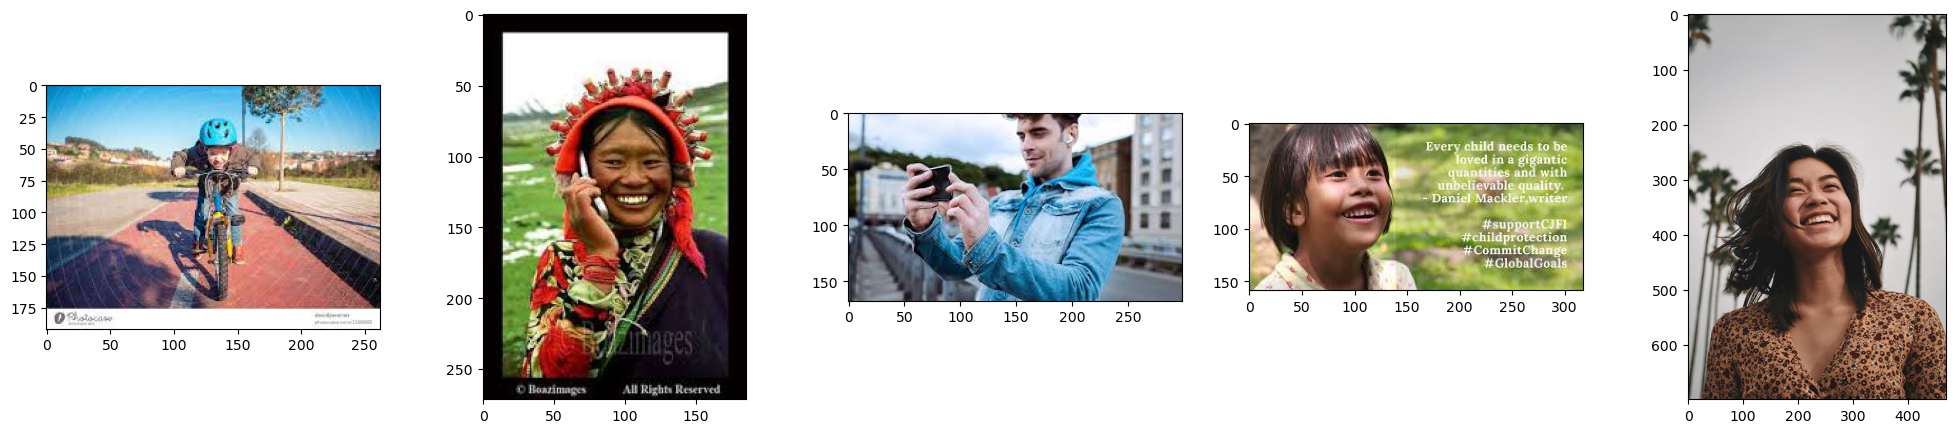

In [117]:
indexes = np.random.randint(0, len(happy_filename_list), 5)

fig, axes = plt.subplots(1, 5, figsize=(25, 5))
i = 0

for index in indexes:
    
    image = cv2.imread(os.path.join(happy_dir, happy_filename_list[index]))
    axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    i += 1

plt.show()

Let's check some of the sad face images.

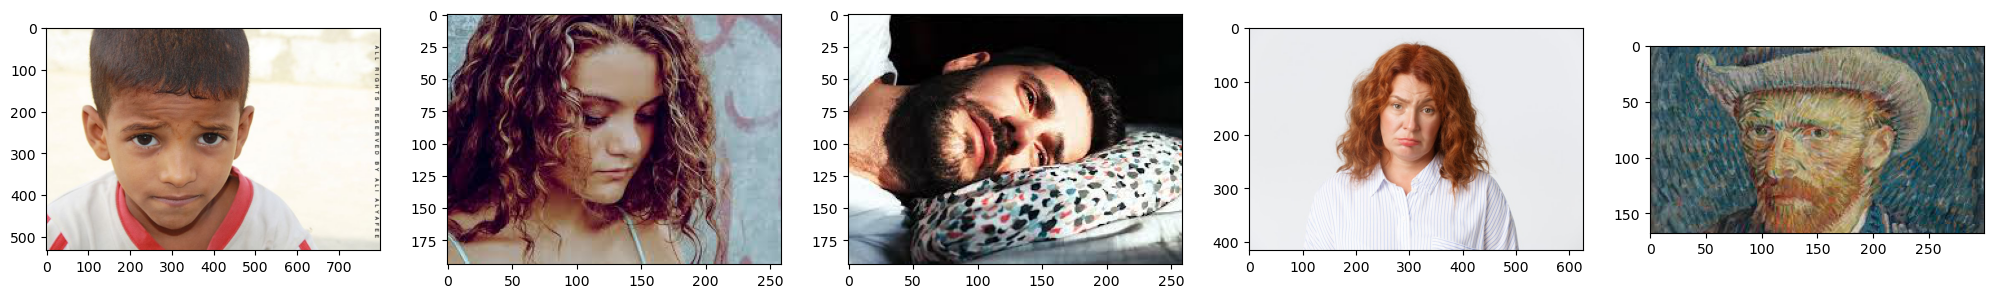

In [118]:
indexes = np.random.randint(0, len(sad_filenam_list), 5)

fig, axes = plt.subplots(1, 5, figsize=(25, 5))
i = 0

for index in indexes:
    
    image = cv2.imread(os.path.join(sad_dir, sad_filenam_list[index]))
    axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    i += 1

plt.show()

[Project Content](#0)

## 3. Creating a Data Pypeline and Loading The Dataset <a id = 3></a>

Here we use keras in order to load and label tha data simultaneously.

In [119]:
data = tf.keras.preprocessing.image_dataset_from_directory("data")

data

Found 222 files belonging to 2 classes.


<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In order to access to the data and iterate over it we can use numpy iterator.

In [120]:
data_iterator = data.as_numpy_iterator()

data_iterator

The last step to get access to the data, is using next method on the data iterator.

In [121]:
batch = data_iterator.next()

len(batch)

2

This number two is bacause of the two parts of that dataset, images and the labels.

In [122]:
print(f"Data batch shape (images) is:            {batch[0].shape}")
print(f"Data target batch shape (labels) is:     {batch[1].shape}")

Data batch shape (images) is:            (32, 256, 256, 3)
Data target batch shape (labels) is:     (32,)


The 32 here means that we are using the default 32 batch size in the data pypeline.

Now we can check the images with their labels.

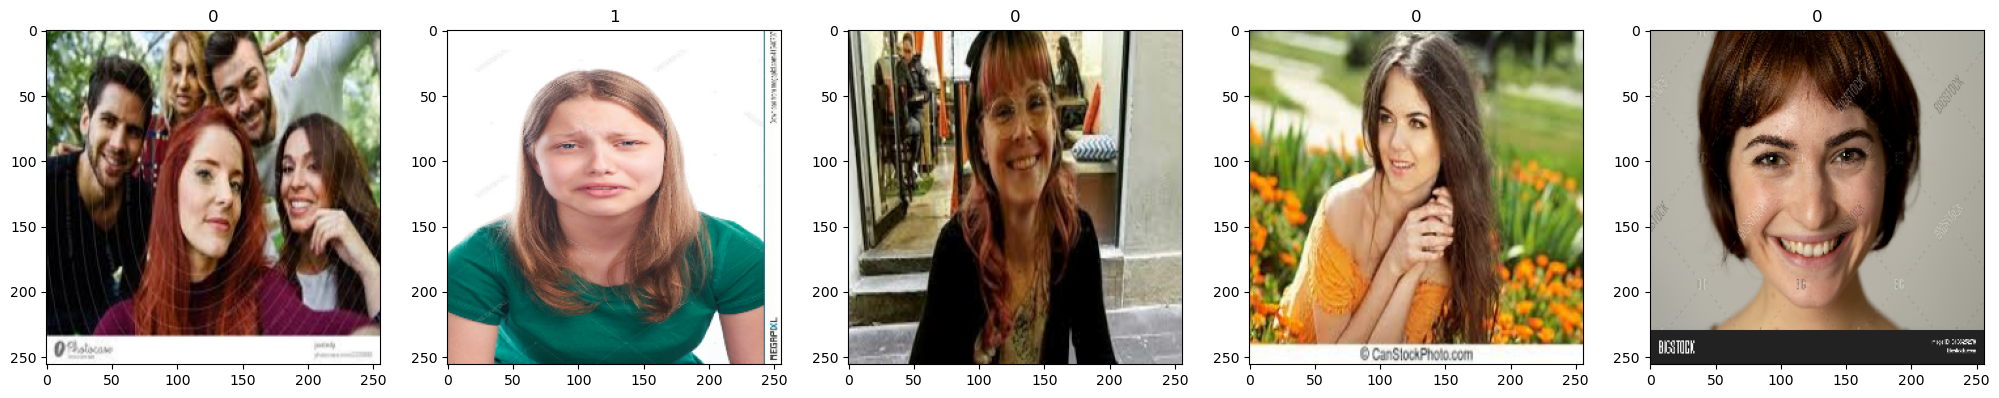

In [123]:
indexes = np.random.randint(0, batch[0].shape[0], 5)

fig, axes = plt.subplots(1, 5, figsize=(25, 5))
i = 0

for index in indexes:
    
    axes[i].imshow(batch[0][index].astype(int))
    
    # We need to convert the pixel values to integer using the astype(int) method before passing them to the imshow() method.
    axes[i].set_title(batch[1][index])
    i += 1

plt.show()

Ok. The 0 labels here is the happy face and 1 label is sad one.

***

# Second Step: Data Preprocessing

***

## 4. Scaling The Data <a id = 4></a>

Firstly, let's check the data values' minimum and maximum.

In [124]:
print(f"Data Minimum: {batch[0].min()}")
print(f"Data Maximum: {batch[0].max()}")

Data Minimum: 0.0
Data Maximum: 255.0


Like most of the times the range of values is between 0 and 255.</br>
Now we can scale the data by deviding its values by 255 to make the learning process faster.

We can do this by using the map function in data pypeline.

In [125]:
data = data.map(lambda x, y: (x/255., y))

Now, we've created the data scaler and the scaler is now embedded in the data pypeline.

Let's check the next batch.

In [126]:
batch = data.as_numpy_iterator().next()

In [127]:
print(f"Data Minimum: {format((batch[0].min()), '.10f')}")
print(f"Data Maximum: {format((batch[0].max()), '.10f')}")

Data Minimum: 0.0000000000
Data Maximum: 1.0000000000


As we know, this won't make any change in the images appearance.

## 5. Seperating Data into Three Parts of Train, Validation and Test Sets <a id = 5></a>

Let's check how many batches the dataset has.

In [128]:
len(data)

7

We want to distribute data among the sets by the proportion of 0.7, 0.1, 0.1.</br>
Firstly, we define sizes (the number of batches in each set).

In [129]:
train_size = int(len(data)*0.75)
val_size = int(len(data)*0.15)
test_size = len(data) - train_size - val_size

print(train_size)
print(val_size)
print(test_size)

5
1
1


Now, we pour the data as much as we have defined in each set using take and skip function in tensorflow.

In [130]:
train = data.take(train_size)
validation = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [131]:
type(train)

tensorflow.python.data.ops.dataset_ops.TakeDataset

***

# Third and Final Step: Modeling

***

## 6. Defining Modeling Functions <a id = 6></a>

In order to create a deep neural network, we define the variable taking the whole model in it and then add settings and features in it.

In [132]:
def get_compiled_model(input_shape, optimizer, loss, metrics):
    """
    This is a Python function that compiles and returns a neural network model using the Keras library.

    Args:
        input_shape (tuple)               The shape of the input data for the model.
        optimizer (str or callable)       The optimizer to use for training the model.
        loss (str or callable)            The loss function to use during training.
        metrics (list)                    The list of evaluation metrics for the model.

    Returns:
        model ()                          The compiled Keras model object that can be used for training and evaluation.
    """
    
    model = Sequential()

    settings = [Conv2D(16, (3, 3), strides=1, activation="relu", input_shape=input_shape),
                
                MaxPool2D(),
                
                Conv2D(32, (3, 3), strides=1, activation="relu", input_shape=input_shape),
                
                MaxPool2D(),
                
                Flatten(),
                
                Dense(256, activation="relu",
                      kernel_initializer ="glorot_uniform",
                      bias_initializer = "zeros"),

                Dense(1, activation="sigmoid")]

    for setting in settings:
        model.add(setting)
        
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
        
    return model

In [133]:
def train_model(model, train_data, epochs, validation_data, callbacks):
    """
    Summary:
    This is a Python function that trains a given neural network model on the provided training data and returns the training history.

    Args:
        model (tensorflow.python.keras.engine.training.Model)   The neural network model object to train.
        train_data (numpy.ndarray)                              The training data to use for training the model.
        train_target (numpy.ndarray)                            The target values for the training data.
        epochs (int)                                            The number of epochs to train the model.
        validation_data (numpy.ndarray)                         The validation data to use for evaluating the model during training.
        callbacks (list)                                        A list of Keras callbacks to use during training.

    Returns:
        history ()                                              The training history object that contains information about the training and validation metrics over each epoch.
    """
    
    history = model.fit(train_data, epochs=epochs, validation_data=validation_data, callbacks=callbacks, verbose=1)
    
    return history

Here, we define some callbacks to get more insights when training, validating or testing the model.

In [134]:
logs_cb = callbacks.TensorBoard(log_dir="logs")

class TrainingCallbacks(Callback):
    
    def on_train_begin(self, logs=None):
        print("Starting training ...")    

    def on_train_end(self, logs=None):
        print(f"Training Finished")
        
class TestingCallbacks(Callback):
    
    def on_test_begin(self, logs=None):
        print("Starting testing ...")    

    def on_test_end(self, logs=None):
        print(f"Testing Finished")
        
class PredictionCallbacks(Callback):
    
    def on_predict_begin(self, logs=None):
        print("Starting prediction ...")    

    def on_predict_end(self, logs=None):
        print(f"Prediction Finished")

2023-05-10 20:30:00.310113: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2023-05-10 20:30:00.310126: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2023-05-10 20:30:00.310181: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


## 7. Building The Model's Architecture <a id = 7></a>

By using the function above, now we can builld the architecture defined in the function and parameters determined as the arguments.

In [135]:
model = get_compiled_model((256, 256, 3),
                           optimizer="rmsprop",
                           loss="binary_crossentropy",
                           metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               31490304  
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

It's better to plot the architecture to understand the network better.

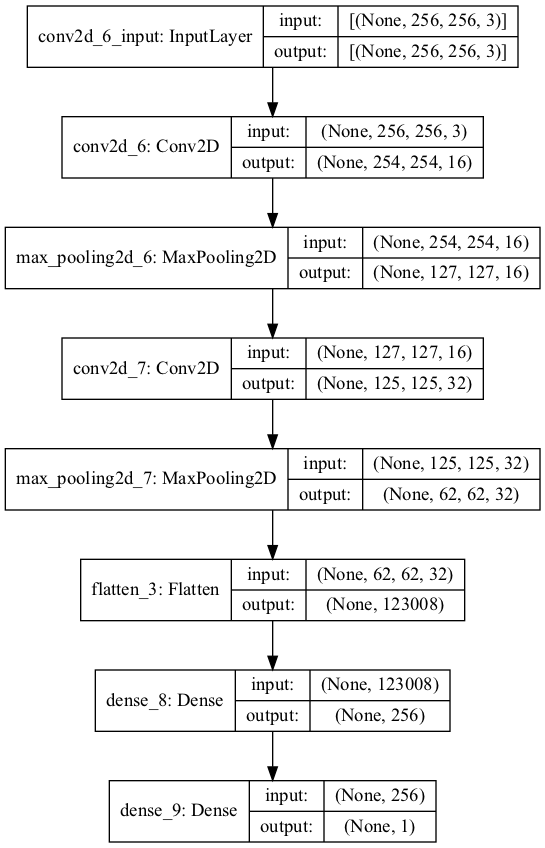

In [136]:
plot_model(model, show_shapes=True, show_layer_names=True)

## 8. First Time Training <a id = 8></a>

Now we can train the model and save its information in a variable to check it out later.

In [137]:
history = train_model(model, train_data=train, epochs=30, validation_data=validation, callbacks=[TrainingCallbacks(), logs_cb])

history_df = pd.DataFrame(history.history)

history_df

Starting training ...
Epoch 1/30


2023-05-10 20:30:01.023464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/5 [=====>........................] - ETA: 5s - loss: 0.7074 - accuracy: 0.3750

2023-05-10 20:30:02.344205: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2023-05-10 20:30:02.344215: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.


3/5 [=================>............] - ETA: 0s - loss: 18.1400 - accuracy: 0.4479

2023-05-10 20:30:02.607544: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2023-05-10 20:30:02.608077: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2023-05-10 20:30:02.609502: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/train/plugins/profile/2023_05_10_20_30_02
2023-05-10 20:30:02.609942: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2023_05_10_20_30_02/Shahriyar-Macbook.local.trace.json.gz
2023-05-10 20:30:02.610557: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/train/plugins/profile/2023_05_10_20_30_02
2023-05-10 20:30:02.610710: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for memory_profile.json.gz to logs/train/plugins/profile/2023_05_10_20_30_02/Shahriyar-Macbook.local.memory_profile.json.gz
2023-05-1

5/5 [==============================] - ETA: 0s - loss: 12.6040 - accuracy: 0.4750

2023-05-10 20:30:03.170588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 3s 425ms/step - loss: 12.6040 - accuracy: 0.4750 - val_loss: 3.1437 - val_accuracy: 0.5625
Epoch 2/30
5/5 [==============================] - 2s 377ms/step - loss: 1.1985 - accuracy: 0.6000 - val_loss: 1.5611 - val_accuracy: 0.6562
Epoch 3/30
5/5 [==============================] - 2s 371ms/step - loss: 0.8264 - accuracy: 0.6375 - val_loss: 1.1625 - val_accuracy: 0.6562
Epoch 4/30
5/5 [==============================] - 2s 358ms/step - loss: 0.5997 - accuracy: 0.7750 - val_loss: 0.5461 - val_accuracy: 0.5938
Epoch 5/30
5/5 [==============================] - 2s 355ms/step - loss: 0.4423 - accuracy: 0.8062 - val_loss: 0.2271 - val_accuracy: 0.9062
Epoch 6/30
5/5 [==============================] - 2s 353ms/step - loss: 0.2715 - accuracy: 0.9375 - val_loss: 0.3154 - val_accuracy: 0.8125
Epoch 7/30
5/5 [==============================] - 2s 354ms/step - loss: 0.2640 - accuracy: 0.9125 - val_loss: 0.2196 - val_accuracy: 0.9688
Epoch 8/30
5/5 [==============

,loss,accuracy,val_loss,val_accuracy
0,12.603979,0.47500,3.143660,0.56250
1,1.198468,0.60000,1.561077,0.65625
2,0.826449,0.63750,1.162466,0.65625
3,0.599694,0.77500,0.546126,0.59375
4,0.442328,0.80625,0.227083,0.90625
5,0.271517,0.93750,0.315405,0.81250
6,0.264027,0.91250,0.219610,0.96875
7,0.380350,0.78125,0.373003,0.78125
8,0.281284,0.90000,0.107709,1.00000
9,0.117585,0.97500,0.086307,1.00000


## 9. Plotting The Models's Loss and Accuracy <a id = 9></a>

Let's check how the model performds in both training and validation datasets through epochs.

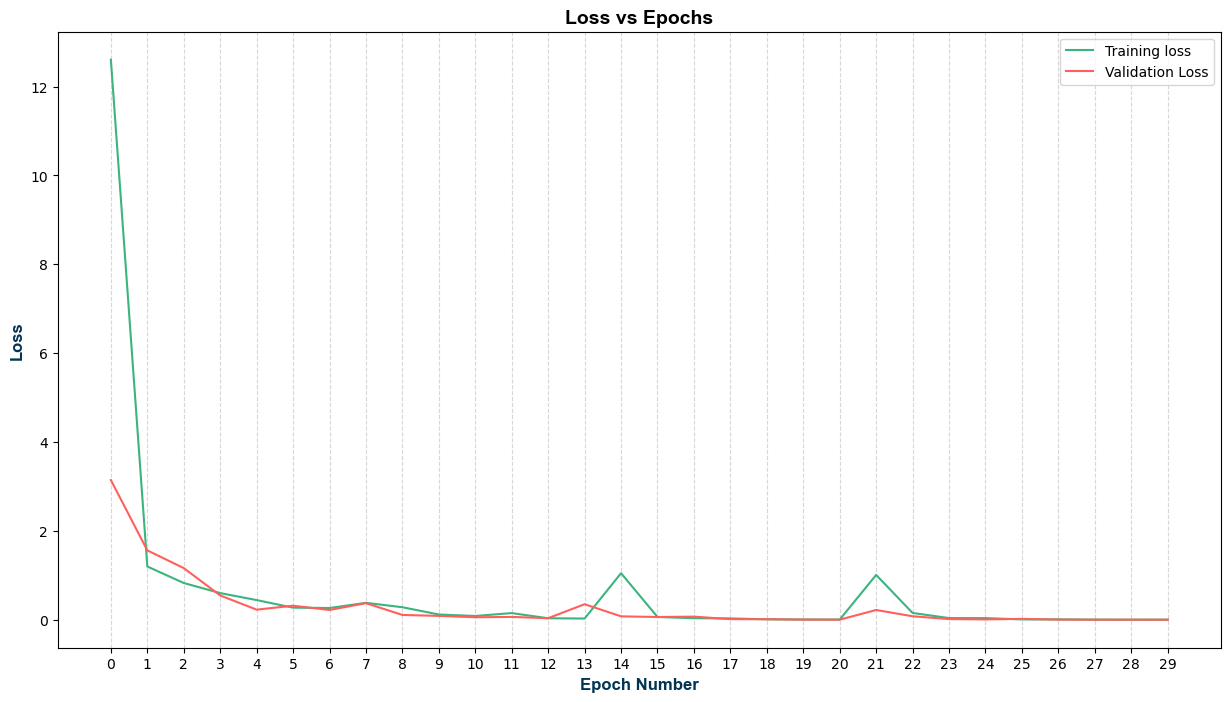

In [138]:
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}
axes_font = {"family" : "arial", "color" : "#023553", "weight" : "bold", "size" : 12}

fig = plt.figure(figsize=(15, 8))

plt.plot(history.history["loss"], color="#3BB47E", label="Training loss")
plt.plot(history.history["val_loss"], color="#FF605C", label="Validation Loss")

plt.xticks(range(len(history.history["loss"])))

plt.legend(loc="upper right")

plt.title("Loss vs Epochs", fontdict = title_font)
plt.xlabel("Epoch Number", fontdict = axes_font)
plt.ylabel("Loss", fontdict = axes_font)

plt.grid(True, axis="x", alpha=0.5, linestyle="--")

plt.show()

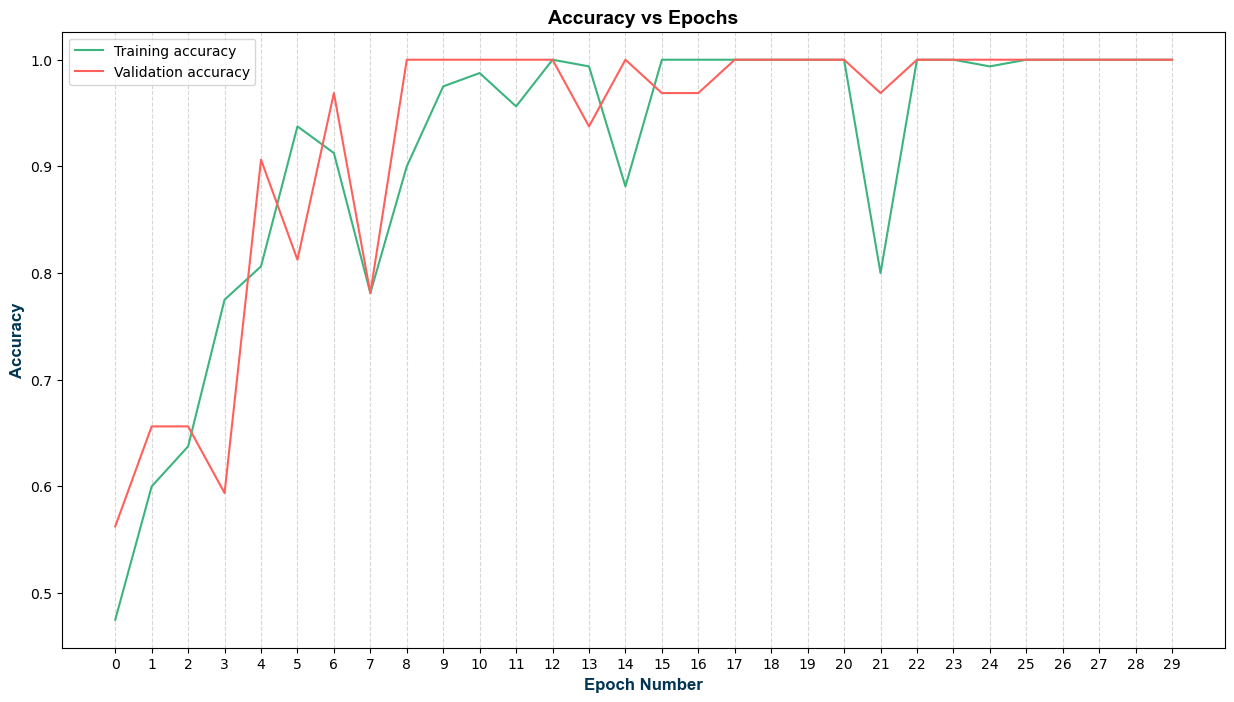

In [139]:
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}
axes_font = {"family" : "arial", "color" : "#023553", "weight" : "bold", "size" : 12}

fig = plt.figure(figsize=(15, 8))

plt.plot(history.history["accuracy"], color="#3BB47E", label="Training accuracy")
plt.plot(history.history["val_accuracy"], color="#FF605C", label="Validation accuracy")

plt.xticks(range(len(history.history["accuracy"])))

plt.legend(loc="upper left")

plt.title("Accuracy vs Epochs", fontdict = title_font)
plt.xlabel("Epoch Number", fontdict = axes_font)
plt.ylabel("Accuracy", fontdict = axes_font)

plt.grid(True, axis="x", alpha=0.5, linestyle="--")

plt.show()

## 10. Model's Performance Evaluation <a id = 10></a>

The last step is to check how the model performs on the testing dataset.</br>
For this goal we will evaluate the model using three metrics.

In [140]:
binary_accuracy = BinaryAccuracy()
recall = Recall()
precision = Precision()

Since we haven't load the dataset in the model we have to update the metrics for each batch of the test set.

In [141]:
for batch in test.as_numpy_iterator():
    
    test_data, test_target = batch
    test_target_pred = model.predict(test_data)
    
    binary_accuracy.update_state(test_target, test_target_pred)
    recall.update_state(test_target, test_target_pred)
    precision.update_state(test_target, test_target_pred)

2023-05-10 20:31:12.221418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [142]:
print("Testing Results")
print("-"*30)

print(f"Binary Accuracy   {(binary_accuracy.result()*100):.4f}")
print(f"Recall            {(recall.result()*100):.4f}")
print(f"Precision         {(precision.result()*100):.4f}")

Testing Results
------------------------------
Binary Accuracy   100.0000
Recall            100.0000
Precision         100.0000


It doesn't seem bad. Model performs acceptable on such a small dataset which is not cleaned enough.

Let's check the model's performance on an image out of Google.

## 10. Model's Performance Evaluation <a id = 10></a>

Let's show the image.

In [143]:
image_types

['jpeg', 'jpg', 'bmp', 'png']

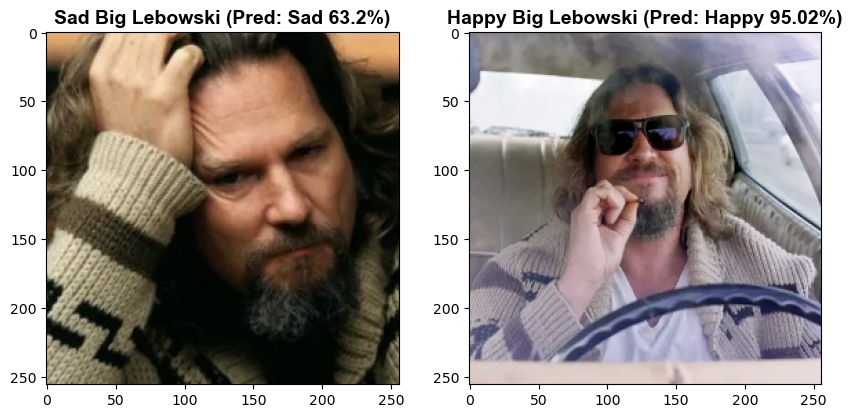

In [144]:
final_test_dir = "final_test"
final_test_list = os.listdir(final_test_dir)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

i = 0

for file_name in final_test_list:
    
    ext = os.path.splitext(file_name)[-1].lower()
    
    if ext[1:] in image_types:
        
        image = cv2.imread(os.path.join(final_test_dir, file_name))
        color_fixed_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resized_image = tf.image.resize(color_fixed_image, (256, 256))
        final_image = resized_image.numpy().astype(int)

        test_target_pred = model.predict(np.expand_dims(final_image/255, 0))
        sad_prob = round(test_target_pred[0][0]*100, 2)
        happy_prob = round((100 - sad_prob), 2)
        
        if happy_prob > sad_prob:
            pred = f"Happy {happy_prob}"
        else:
            pred = f"Sad {sad_prob}"

        title = f"{file_name.split('.')[0]} (Pred: {pred}%)"                           
                                                        
        axes[i].imshow(final_image)
        axes[i].set_title(title, fontdict=title_font)
        
        i += 1
        
plt.show()